## The below is done in this python notebook by Susrita Das from C61

#### Importing important libraries
#### Load and read the dataset
#### Data analysis
#### Data cleaning and correction
#### Univariate analysis of cnt with other columns
#### Bivariate analysis
#### Multivariate analysis
#### Model preparation
#### linear regression
#### creating OLS modules (2)
#### making predictions
#### calculating r2 on the best model
#### Predictions and suggestions to the company or observations - in the bottom of the file

In [200]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [201]:
#read dataset
df = pd.read_csv('Downloads\day.csv')

In [202]:
df.head

<bound method NDFrame.head of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed 

In [203]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [204]:
df.shape

(730, 16)

In [205]:
# map column numbers into thier original texts and some data cleaning
df['dteday'] = pd.to_datetime(df['dteday'])
df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.weathersit=df.weathersit.map({1:'Best', 2:'Neutral', 3:'Bad', 4:'Worse'})
df.mnth=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.weekday=df.weekday.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
df.head()

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\1754931982.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dteday'] = pd.to_datetime(df['dteday'])


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600


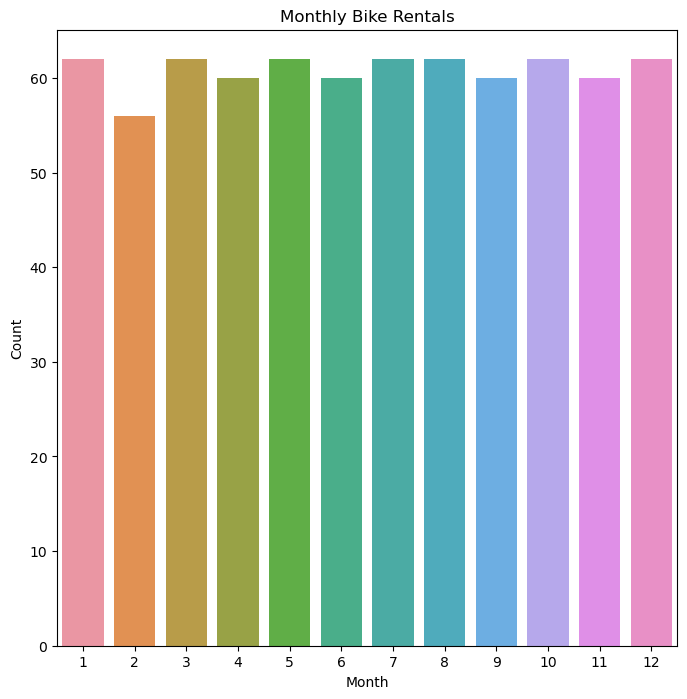

In [114]:
# Univariate Analysis - 'mnth' column
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='mnth')
plt.title('Monthly Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



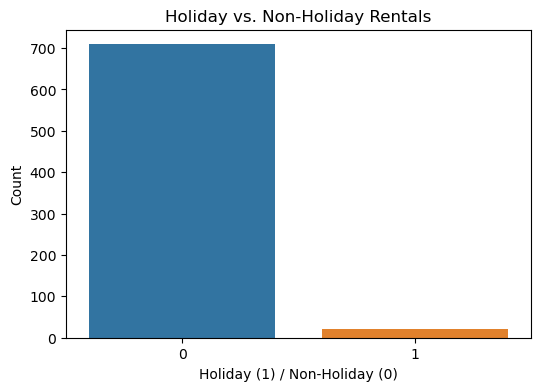

In [115]:
# Univariate Analysis - 'holiday' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='holiday')
plt.title('Holiday vs. Non-Holiday Rentals')
plt.xlabel('Holiday (1) / Non-Holiday (0)')
plt.ylabel('Count')
plt.show()

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\1349903101.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weekday', y='cnt', ci=None)


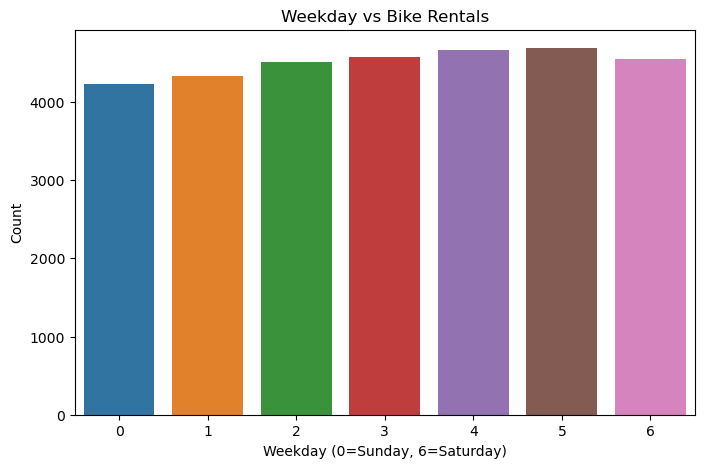

In [116]:
# Univariate Analysis - 'weekday' vs 'cnt'
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='weekday', y='cnt', ci=None)
plt.title('Weekday vs Bike Rentals')
plt.xlabel('Weekday (0=Sunday, 6=Saturday)')
plt.ylabel('Count')
plt.show()


C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\2022417033.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='workingday', y='cnt', ci=None)


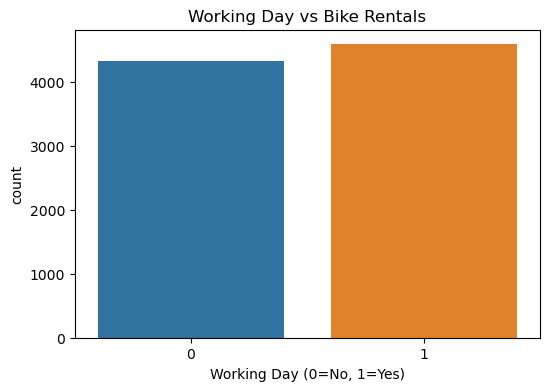

In [117]:
# Univariate Analysis - 'workingday' vs 'cnt'
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='workingday', y='cnt', ci=None)
plt.title('Working Day vs Bike Rentals')
plt.xlabel('Working Day (0=No, 1=Yes)')
plt.ylabel('count')
plt.show()

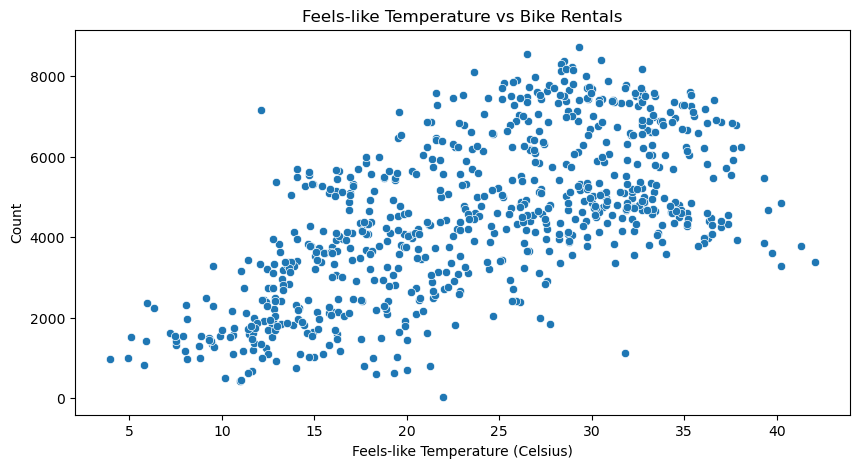

In [118]:
# Univariate Analysis - 'atemp' vs 'cnt'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='atemp', y='cnt')
plt.title('Feels-like Temperature vs Bike Rentals')
plt.xlabel('Feels-like Temperature (Celsius)')
plt.ylabel('Count')
plt.show()


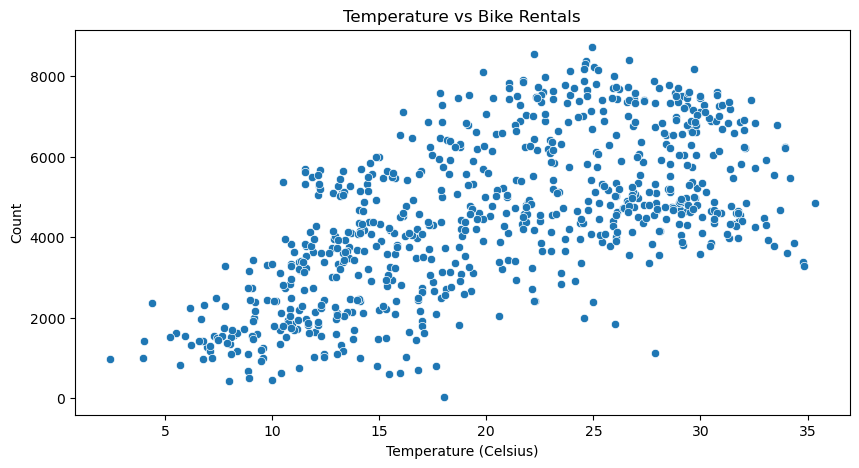

In [119]:
# Univariate Analysis - 'temp' vs 'cnt'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='temp', y='cnt')
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Count')
plt.show()

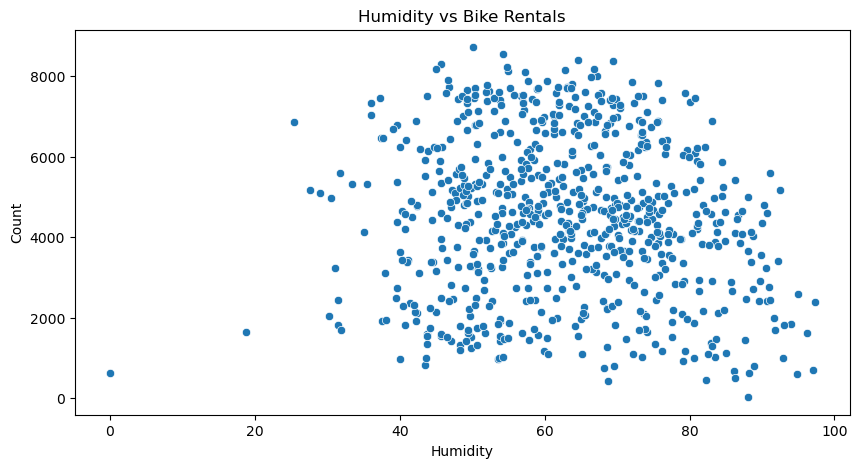

In [73]:
# Univariate Analysis - 'hum' vs 'cnt'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='hum', y='cnt')
plt.title('Humidity vs Bike Rentals')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

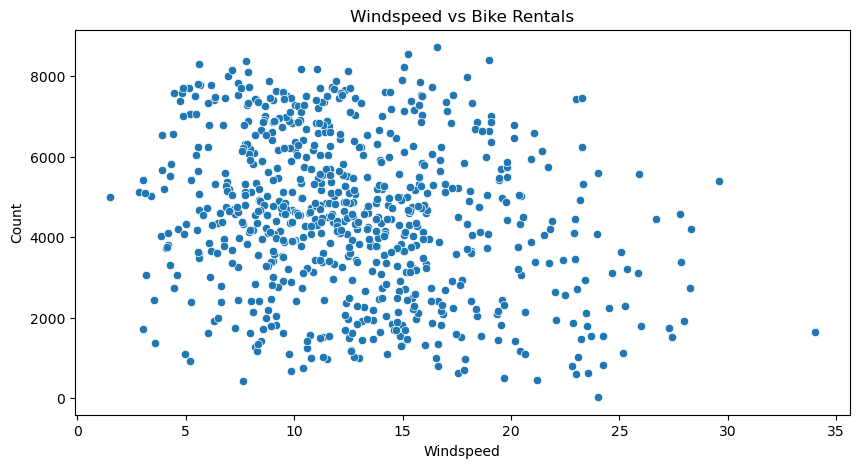

In [120]:
# Univariate Analysis - 'windspeed' vs 'cnt'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.title('Windspeed vs Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

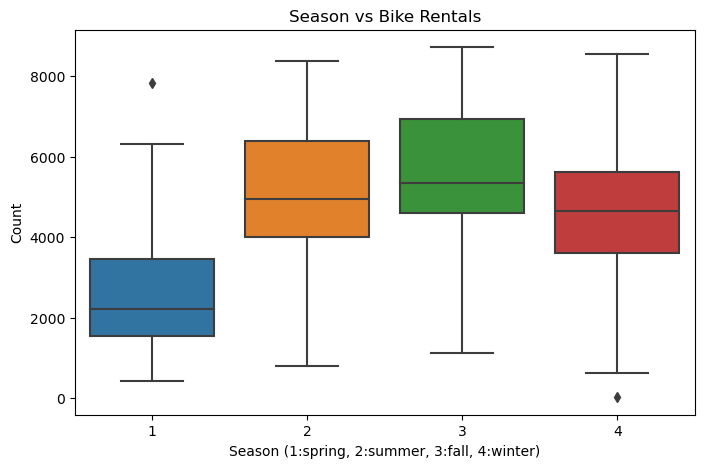

In [121]:
# Univariate Analysis - 'season' vs 'cnt'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='season', y='cnt')
plt.title('Season vs Bike Rentals')
plt.xlabel('Season (1:spring, 2:summer, 3:fall, 4:winter)')
plt.ylabel('Count')
plt.show()

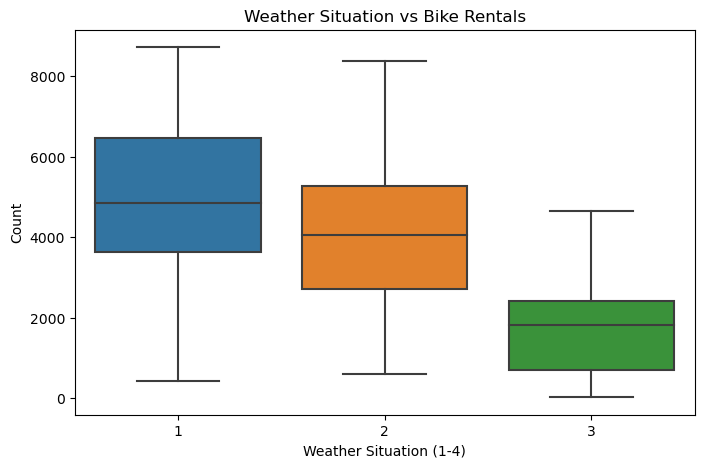

In [122]:
# Univariate Analysis - 'weathersit' vs 'cnt'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.title('Weather Situation vs Bike Rentals')
plt.xlabel('Weather Situation (1-4)')
plt.ylabel('Count')
plt.show()

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\3934902858.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='cnt', ci=None)


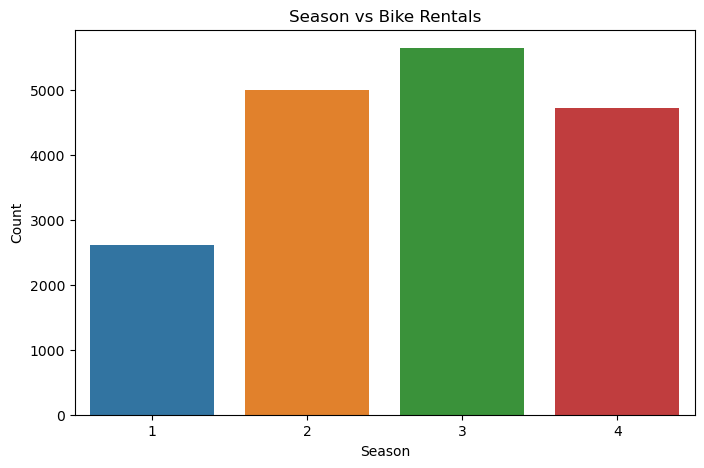

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\3934902858.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='cnt', ci=None)


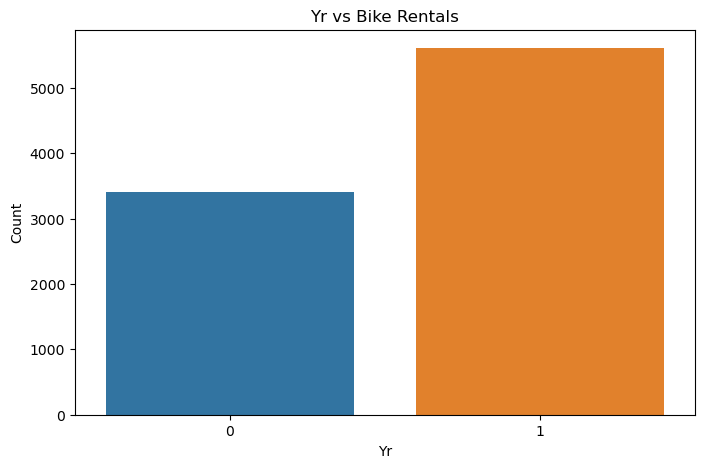

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\3934902858.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='cnt', ci=None)


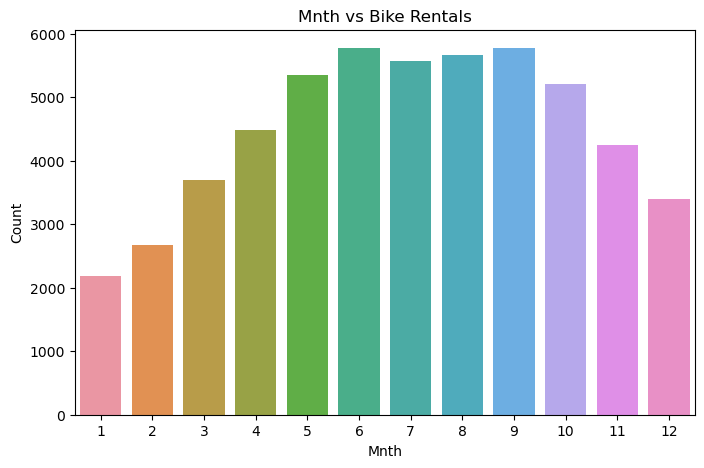

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\3934902858.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='cnt', ci=None)


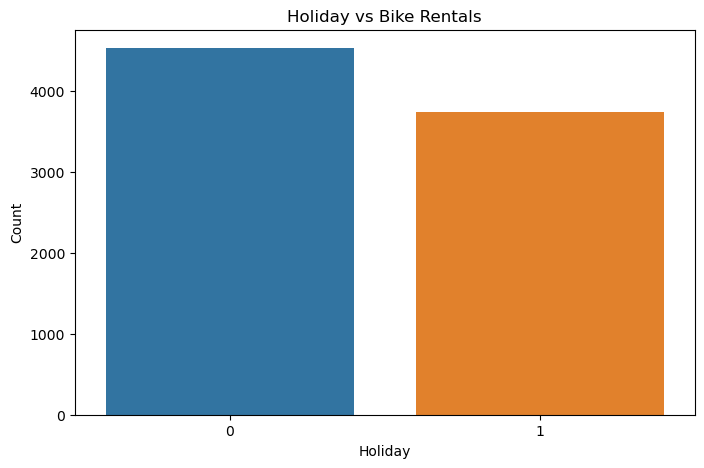

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\3934902858.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='cnt', ci=None)


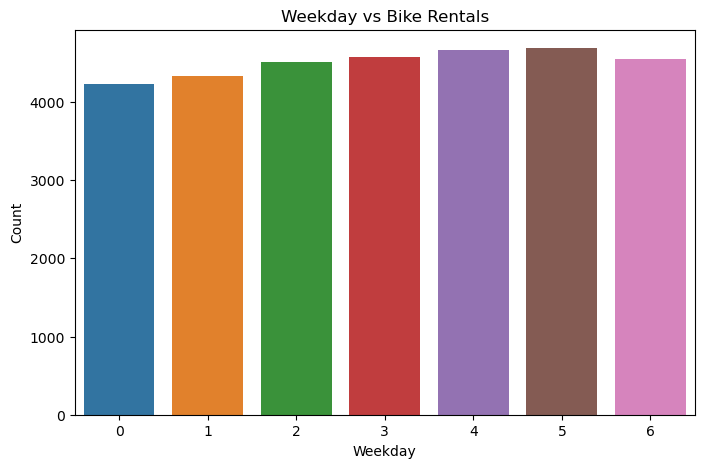

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\3934902858.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='cnt', ci=None)


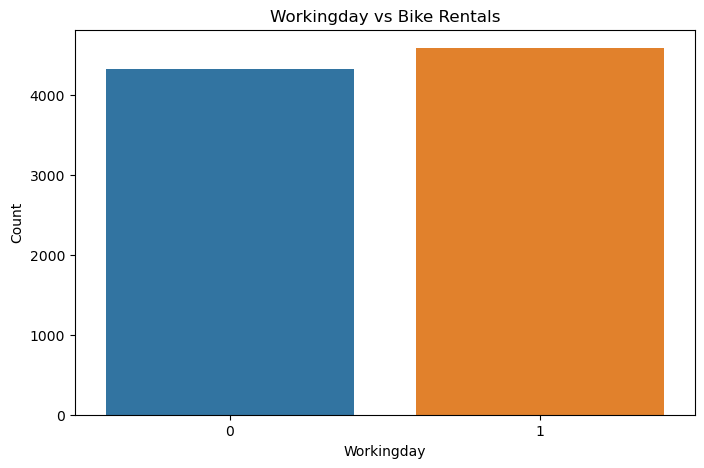

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\3934902858.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='cnt', ci=None)


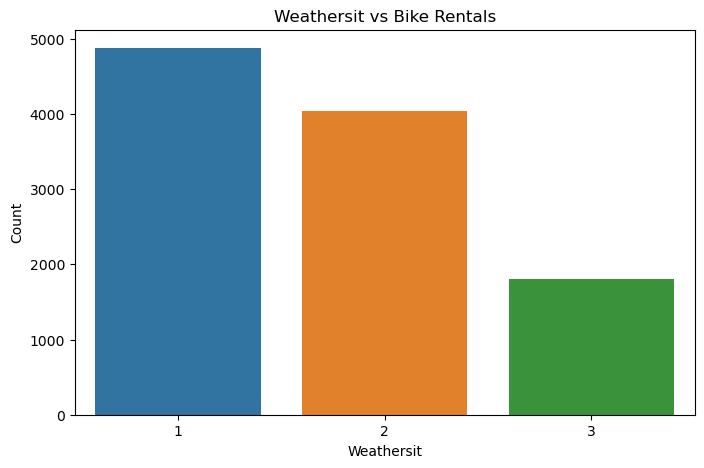

In [123]:
#bivariate analysis on all columns vs cnt
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Bivariate Analysis - Bar plots for categorical features vs 'cnt'
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x=column, y='cnt', ci=None)
    plt.title(f'{column.capitalize()} vs Bike Rentals')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.show()

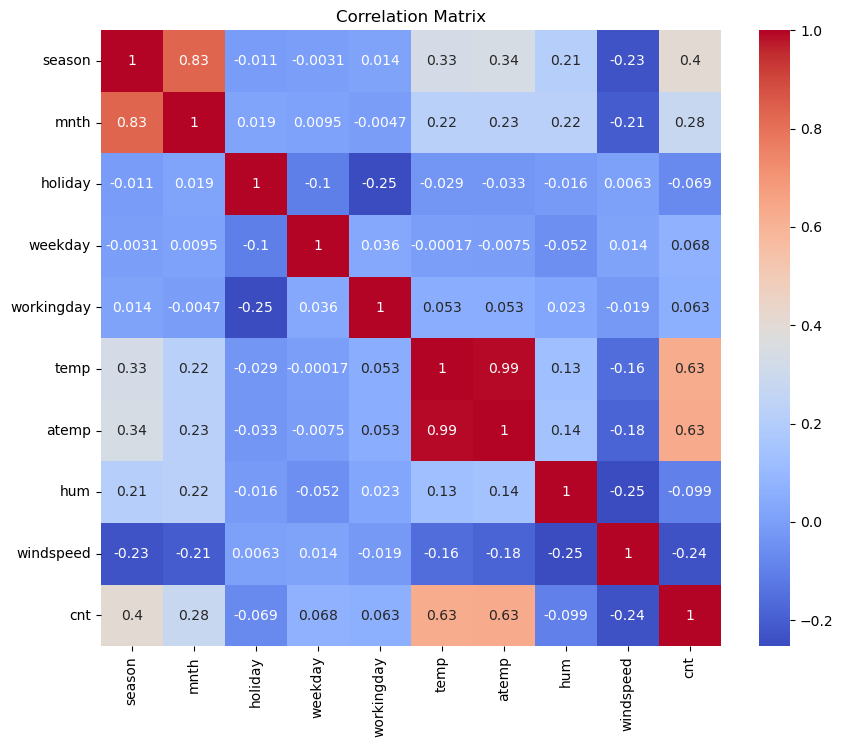

In [124]:
# Multivariate Analysis - Correlation Matrix
correlation_matrix = df[['season','mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [206]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [208]:
print('------------Winter Months-------------------------')
print('Months')
print(df[df['season']=='winter'].mnth.value_counts())
print('------------Spring Months-------------------------')
print('Months')
print(df[df['season']=='spring'].mnth.value_counts())
print('------------Summer Months-------------------------')
print('Months')
print(df[df['season']=='summer'].mnth.value_counts())
print('--------------Fall Months-------------------------')
print('Months')
print(df[df['season']=='fall'].mnth.value_counts())

------------Winter Months-------------------------
Months
Oct    62
Nov    60
Dec    40
Sep    16
Name: mnth, dtype: int64
------------Spring Months-------------------------
Months
Jan    62
Feb    56
Mar    40
Dec    22
Name: mnth, dtype: int64
------------Summer Months-------------------------
Months
May     62
Apr     60
June    40
Mar     22
Name: mnth, dtype: int64
--------------Fall Months-------------------------
Months
Jul     62
Aug     62
Sep     44
June    20
Name: mnth, dtype: int64


In [209]:
df=df.drop(['casual', 'registered'],axis=1)
df=df.drop('atemp',axis=1)
df=df.drop('instant',axis=1)
df=df.drop('dteday',axis=1)
df.head()






,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Neutral,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Neutral,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Best,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Best,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Best,9.305237,43.6957,12.522300,1600


In [210]:
#Creating Dummy variables

def dummies(x,dataframe):
    temp = pd.get_dummies(dataframe[x], drop_first = True)
    dataframe = pd.concat([dataframe, temp], axis = 1)
    dataframe.drop([x], axis = 1, inplace = True)
    return dataframe
# Applying the function to the bikeSharing

df = dummies('season',df)
df = dummies('mnth',df)
df = dummies('weekday',df)
df = dummies('weathersit',df)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [211]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.634247,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.634247,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test= train_test_split(df,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [214]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

need_rescale=['temp','hum','windspeed','cnt']
df_train[need_rescale]=scaler.fit_transform(df_train[need_rescale])

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
y_train=df_train.pop('cnt')
X_train=df_train

In [216]:
#build model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

# Specify the number of features to select (e.g., 15)
num_features_to_select = 15

rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X_train, y_train)


list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Best', True, 1),
 ('Neutral', True, 1)]

In [217]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Best', 'Neutral'],
      dtype='object')

In [218]:
X_train.columns[~rfe.support_]


Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [219]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sep,Sat,Best,Neutral
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [220]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to train a linear regression model
def model(X, y):
    X = sm.add_constant(X)  # Add a constant term (intercept) to the features
    model = sm.OLS(y, X).fit()
    return model

# Function to calculate VIF for each feature
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Example usage:
# Assuming you have X_train_rfe and y_train as your features and target
optimized_model = model(X_train_rfe, y_train)
vif = calculate_vif(X_train_rfe)

# Print model summary and VIF results
print(optimized_model.summary())
print(vif)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.22e-191
Time:                        16:53:12   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.048      0.092      0.9

In [187]:
X_train_rfe = X_train_rfe.drop('Jan', axis=1)

In [188]:
new_model = model(X_train_rfe, y_train)
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.11e-191
Time:                        16:27:09   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.048     -0.100      0.9

In [189]:
X_train_rfe = X_train_rfe.drop('Neutral', axis=1)

In [190]:
third_model = model(X_train_rfe, y_train)
print(third_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.29e-180
Time:                        16:32:32   Log-Likelihood:                 489.18
No. Observations:                 510   AIC:                            -950.4
Df Residuals:                     496   BIC:                            -891.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2106      0.041      5.091      0.0

In [222]:
# 1. Identify the columns present in X_train_rfe but not in X_test
missing_columns = set(X_train_rfe.columns) - set(X_test.columns)

# 2. Drop the missing columns from X_train_rfe
X_train_rfe = X_train_rfe.drop(columns=missing_columns)

In [224]:
#All the variables seems significant now after evaluating P>|t| and VIF

#R squared from model summary is 0.842
r2=0.847

#Calculating adjusted R squared:
n =  X_train_rfe.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p =  X_train_rfe.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.8451749502982107

In [227]:
#Rebuilding the first model
lm_model1=sm.OLS(y_train,X_train_rfe).fit()
y_train_pred1=lm_model1.predict(X_train_rfe)

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8348\3385507784.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred1), bins = 20)


Text(0.5, 0, 'Errors')

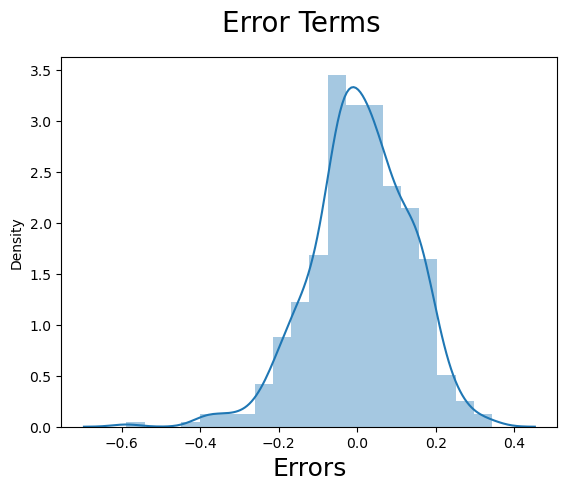

In [228]:
%matplotlib inline
fig = plt.figure()
sns.distplot((y_train - y_train_pred1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [230]:
residuals = y_train - y_train_pred1

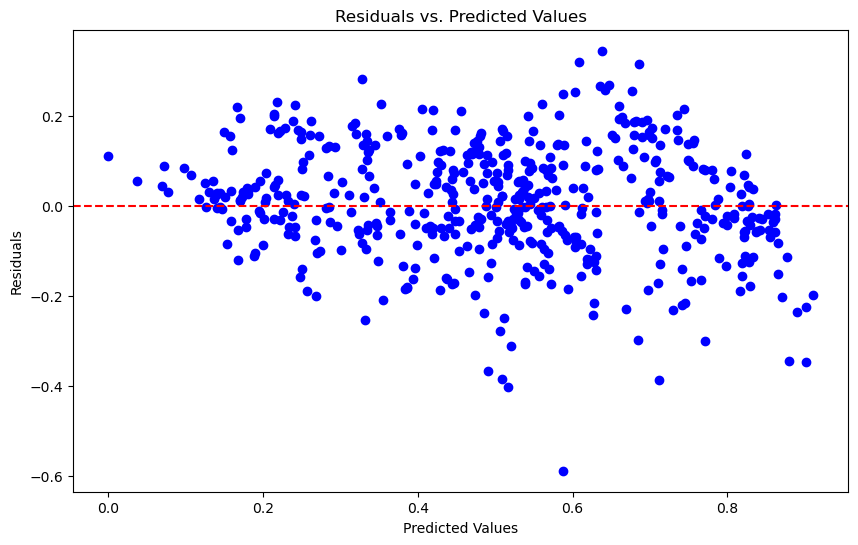

In [232]:
# Residuals vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred1, residuals, color='blue')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

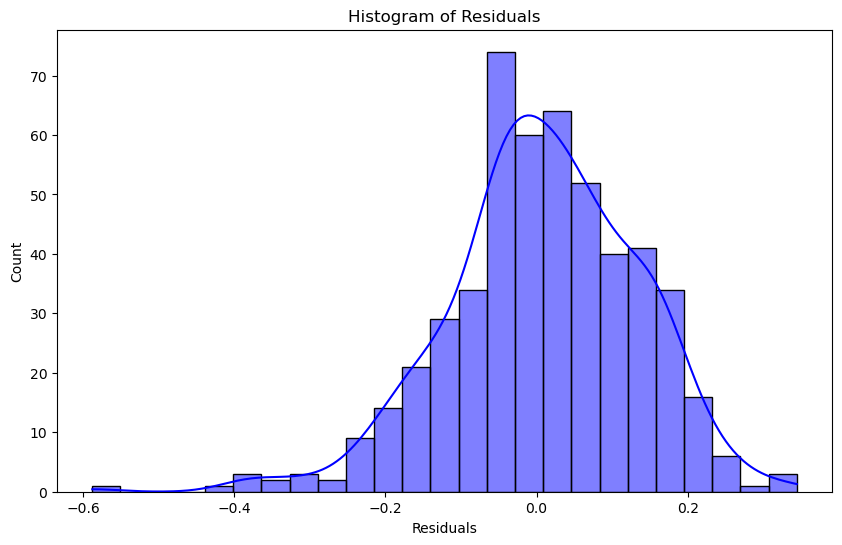

In [233]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

C:\Users\002O5L744\AppData\Local\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


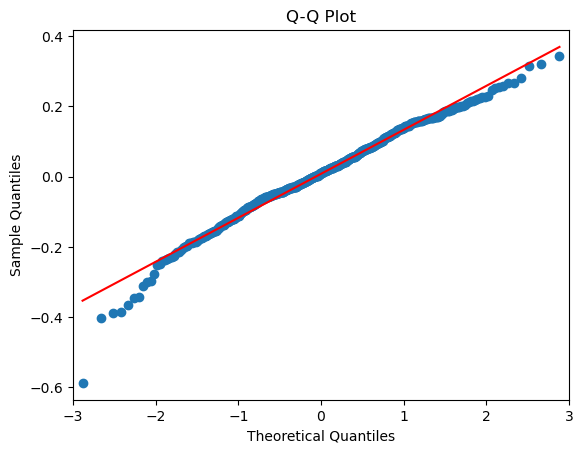

In [234]:
# Q-Q Plot (Normality Check)
import statsmodels.api as sm
import scipy.stats as stats

qq_plot = sm.qqplot(residuals, line='s', color='blue')
plt.title('Q-Q Plot')
plt.show()

# the first Model looks good hence selecting it for prediction

In [235]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [236]:

df_test[need_rescale]=scaler.transform(df_test[need_rescale])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [239]:
X_test_model1=df_test[X_train_rfe.columns]
X_test_model1.head()

,yr,holiday,workingday,temp,hum,windspeed
184,0,1,0,0.831783,0.657364,0.084219
535,1,0,1,0.901354,0.610133,0.153728
299,0,0,1,0.511964,0.837699,0.334206
221,0,0,1,0.881625,0.437098,0.339570
152,0,0,1,0.817246,0.314298,0.537414


In [240]:
X_test_model1=sm.add_constant(X_test_model1)


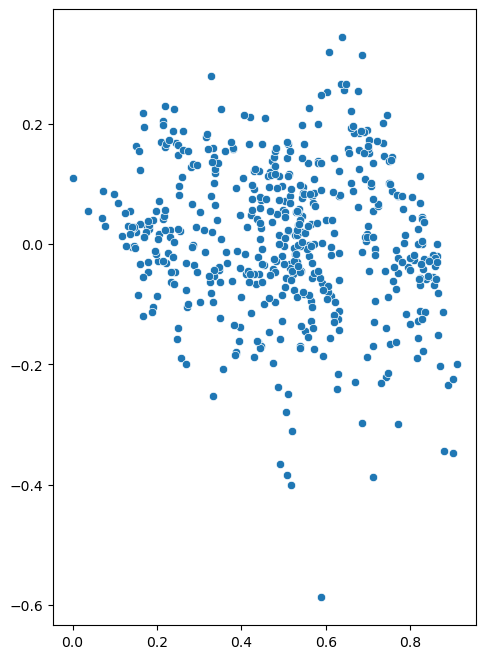

In [249]:
#Checking Homoscedasticity for train and test data
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(y=y_train - y_train_pred1, x=y_train_pred1)
plt.show()

# Key Focus Areas for the Company:

### Temperature Sensitivity:
The data suggests that bike usage is temperature-sensitive. People are less likely to use the service at extremely high or low temperatures. To optimize operational costs and enhance profitability, the company should consider operating at reduced capacity during extreme temperature conditions. Focusing on registered customers during such periods could also be more cost-effective.


### Weather Conditions Impact: 
It's evident that users prefer the service during best or neutral weather conditions, including clear skies and misty conditions. The company should plan its service offerings and promotions around these favorable weather patterns to maximize user engagement.

### Humidity and Wind Sensitivity: 
Days with high humidity and strong windspeeds have a negative impact on bike usage. Offering discounts or promotions during such conditions may not be effective, as it's inconvenient for customers to commute by bike. Instead, the company should prepare for decreased demand on such days and manage resources accordingly.

### Yearly Growth:
The data indicates a positive relationship between the year variable and bike rental demand. As people adapt to bike sharing, there is an expected increase in users over time. While external factors like the COVID-19 pandemic may have influenced the trend, the long-term outlook suggests a steady rise in the number of users.

###  Additional Considerations:
In addition to the above, the company should continuously monitor and adapt to changing market conditions. This may involve data-driven strategies such as personalized user offers, expanding service areas, and improving bike availability to meet the evolving demands of its customers.
By focusing on these key areas and being responsive to market dynamics, the company can enhance its profitability and maintain a competitive edge in the bike-sharing industry.Weather Conditions Impact: It's evident that users prefer the service during best or neutral weather conditions, including clear skies and misty conditions. The company should plan its service offerings and promotions around these favorable weather patterns to maximize user engagement.

### Humidity and Wind Sensitivity:
Days with high humidity and strong windspeeds have a negative impact on bike usage. Offering discounts or promotions during such conditions may not be effective, as it's inconvenient for customers to commute by bike. Instead, the company should prepare for decreased demand on such days and manage resources accordingly.

### Yearly Growth: 
The data indicates a positive relationship between the year variable and bike rental demand. As people adapt to bike sharing, there is an expected increase in users over time. While external factors like the COVID-19 pandemic may have influenced the trend, the long-term outlook suggests a steady rise in the number of users.

### Additional Considerations:
In addition to the above, the company should continuously monitor and adapt to changing market conditions. This may involve data-driven strategies such as personalized user offers, expanding service areas, and improving bike availability to meet the evolving demands of its customers.

### By focusing on these key areas and being responsive to market dynamics, the company can enhance its profitability and maintain a competitive edge in the bike-sharing industry.

## Hypothesis Testing and Findings:

#### Null Hypothesis: 
The null hypothesis assumed no relationship between the independent variables (X) and the dependent variable (Y), implying that the coefficients of the independent variables are equal to zero.

#### Rejection of Null Hypothesis: 
The model's summary clearly indicates that all the coefficients of the independent variables are not equal to zero. Therefore, we reject the null hypothesis, signifying a statistically significant relationship between the independent variables and bike rental demand.

## r2=0.847
## adjusted r2 = 0.845